## Problem 1

In [26]:
import sympy as sp
from sympy import sin, cos, pi
import numpy as np

theta0, theta1, theta2, theta3, theta4, theta5 = sp.symbols('theta0 theta1 theta2 theta3 theta4 theta5')
d0, d1, d2, d3, d4, d5 = sp.symbols('d0 d1 d2 d3 d4 d5')
a0, a1, a2, a3, a4, a5 = sp.symbols('a0 a1 a2 a3 a4 a5')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = sp.symbols('alpha0 alpha1 alpha2 alpha3 alpha4 alpha5')

theta_0, d_0, a_0, alpha_0 = theta0, 50e-3, 0, pi/2
theta_1, d_1, a_1, alpha_1 = theta1 + pi/2, 0, 93e-3, 0
theta_2, d_2, a_2, alpha_2 = theta2, 0, 93e-3, 0
theta_3, d_3, a_3, alpha_3 = theta3, 0, 0, 0

theta = [theta_0, theta_1, theta_2, theta_3]
d = [d_0, d_1, d_2, d_3]
a = [a_0, a_1, a_2, a_3]
alpha = [alpha_0, alpha_1, alpha_2, alpha_3]

# Rød=x, Grøn=y, Blå=z
joint_matrix = sp.Matrix([
                 [0, 0, 0, 0],
                 [theta_0, d_0, a_0, alpha_0],
                 [theta_1, d_1, a_1, alpha_1],
                 [theta_2, d_2, a_2, alpha_2],
                 [theta_3, d_3, a_3, alpha_3]])

display(joint_matrix)


Matrix([
[            0,    0,     0,    0],
[       theta0, 0.05,     0, pi/2],
[theta1 + pi/2,    0, 0.093,    0],
[       theta2,    0, 0.093,    0],
[       theta3,    0,     0,    0]])

In [27]:
T = lambda theta, d, a, alpha: sp.Matrix([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
                                          [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
                                          [0, sin(alpha), cos(alpha), d],
                                          [0, 0, 0, 1]])
Translation = lambda x, y, z: sp.Matrix([[1, 0, 0, x],
                                         [0, 1, 0, y],
                                         [0, 0, 1, z],
                                         [0, 0, 0, 1]])
A = sp.Matrix([[1, 0, 0, 0],
                                         [0, 1, 0, 0],
                                         [0, 0, 1, 0],
                                         [0, 0, 0, 1]])
T_arr = [A]
for (th, di, ai, al) in zip(theta, d, a, alpha):
     T_arr.append(T_arr[-1]*T(th, di, ai, al))

pointer = [50e-3, 0, 0]
camera = [35e-3, 45e-3, 0]

T_4 = T_arr[4] * Translation(*pointer)
T_5 = T_arr[4] * Translation(*camera)

T_arr.append(T_4)
display(T_4)

Matrix([
[(sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta3), (sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - (-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*sin(theta3),  sin(theta0), 0.05*(sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + 0.05*(-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta3) - 0.093*sin(theta1)*cos(theta0)*cos(theta2) - 0.093*sin(theta1)*cos(theta0) - 0.093*sin(theta2)*cos(theta0)*cos(theta1)],
[(sin(theta0)*sin(theta1)*sin(theta2) - sin(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta0)*sin(theta1)*cos(theta2) - sin(theta0)*sin(theta2)*cos(theta1))*cos(theta3), (sin(theta0)*sin(theta1)*sin(theta2) - sin(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - (-sin(theta0)*sin(theta1)*cos(thet

## Problem 2

In [28]:
def get_angles(T, pos, initial_guess):
    x_04 = T[0:3,0]
    o_04 = T[0:3,3]
    eq1 = sp.Eq(o_04[0], pos[0])
    eq2 = sp.Eq(o_04[1], pos[1])
    eq3 = sp.Eq(o_04[2], pos[2])
    eq4 = sp.Eq(x_04[2], 0)
    
    # Solve numerically
    solution = sp.nsolve((eq1, eq2, eq3, eq4), [theta0, theta1, theta2, theta3], initial_guess, tol=1e-6)
    #convert to degrees
    solution = [s for s in solution]
    
    return solution

# Example usage
initial_guess = [1, 1, 1, 1]  # Provide an initial guess for the angles
pos = sp.Matrix([150e-3, 0, 120e-3])  # Example position
angles = get_angles(T_4, pos, initial_guess)

print(angles)
print("Position")
display(T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1]))

[3.14159265091813, -12.4612367194736, 14.2762437581543, -6.52739601906535]
Position


Matrix([
[    0.149999997930147],
[-4.00749979384566e-10],
[     0.11999998299887],
[                    1]])

## Problem 3

In [29]:
from mpl_toolkits.mplot3d import Axes3D

pc = sp.Matrix([150e-3, 0, 120e-3])
R = 32e-3
p_circ = [pc + R*sp.Matrix([0, cos(phi), sin(phi)]) for phi in np.linspace(0, 2*np.pi, 36)] 

angles_circ = []
initial_guess = [0.210182586676604, -0.140623923276670, -1.66990262183703, 0.239730218318808]
for p in p_circ:
    angles_circ_temp = get_angles(T_4, p, initial_guess)
    initial_guess = angles_circ_temp
    angles_circ_temp = [(angle + np.pi) % (2 * np.pi) - np.pi for angle in angles_circ_temp]
    angles_circ.append(angles_circ_temp)

print(angles_circ)

[[0.210182586662170, -0.140623923147677, -1.66990262059900, 0.239730216951784], [0.206901182267624, -0.126700642605097, -1.62290583692430, 0.178810152734502], [0.197136011272659, -0.114583984464211, -1.57635385393667, 0.120141511605985], [0.181128550709079, -0.104422480626527, -1.53180525005302, 0.0654314038846469], [0.159294005770557, -0.0962319766926005, -1.49086392699915, 0.0162995768968490], [0.132234870489749, -0.0899264702277849, -1.45512199394789, -0.0257478626192209], [0.100749602909215, -0.0853544458337101, -1.42607870371073, -0.0593631772504577], [0.0658282883977703, -0.0823399282331527, -1.40503907385071, -0.0834173247110375], [0.0286285507911570, -0.0807250082759068, -1.39300307467962, -0.0970682438393742], [-0.00957088854224075, -0.0804074916976769, -1.39056517891334, -0.0998236561838834], [-0.0474354983200671, -0.0813656021777884, -1.39784788518305, -0.0915828394340577], [-0.0836496258639339, -0.0836633006287948, -1.41448737394712, -0.0726456522189829], [-0.11698795750147

**Illustration of inverse kinematics**

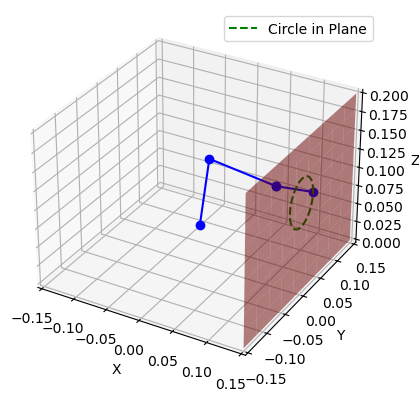

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

def plot_robot_from_angles(angles):
    p1 = T_arr[1].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p2 = T_arr[2].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p3 = T_arr[3].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p4 = T_arr[4].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p5 = T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])

    import matplotlib.pyplot as plt    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract points
    points = [p1, p2, p3, p4, p5]
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    z_vals = [p[2] for p in points]

    # Plot points and lines
    ax.plot(x_vals, y_vals, z_vals, marker='o', linestyle='-', color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-0.15, 0.15])
    ax.set_ylim([-0.15, 0.15])
    ax.set_zlim([0, 0.2])
    # Plot a plane with x=0.15
    xx, yy = np.meshgrid(np.linspace(-0.15, 0.15, 10), np.linspace(0, 0.2, 10))
    zz = np.zeros_like(xx) + 0.15
    ax.plot_surface(zz, xx, yy, color='r', alpha=0.5)
    # Plot the circle in the plane
    x_vals = [p[0] for p in p_circ]
    y_vals = [p[1] for p in p_circ]
    z_vals = [p[2] for p in p_circ]
    ax.plot(x_vals, y_vals, z_vals, 'g--', label='Circle in Plane')
    ax.legend()
    plt.show()

    
plot_robot_from_angles(angles_circ[0])



## Problem 4

In [31]:
Jac = sp.zeros(6, 4)
o_n = T_arr[-1][:3, 3]
for i in range(1, T_arr.__len__()-1):
    z_i1 = T_arr[i-1][:3, 2]
    o_i1 = T_arr[i-1][:3, 3]
    Jac[:3, i-1] = z_i1.cross(o_n - o_i1)
    Jac[3:, i-1] = z_i1

In [32]:
# Define the function to round and set small values to 0
def round_and_zero(matrix, decimals, threshold=1e-10):
    def process_value(x):
        rounded_value = round(x, decimals)
        return rounded_value if abs(rounded_value) >= threshold else 0
    return matrix.applyfunc(process_value)

# Updated print_jac function
def print_jac(angles):
    jacobian = Jac.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})
    processed_jacobian = round_and_zero(jacobian, 4)
    display(processed_jacobian)

print("Jacobian for phi = 0")
print_jac(angles_circ[0])
print("Jacobian for phi = pi/2")
print_jac(angles_circ[9])
print("Jacobian for phi = pi")
print_jac(angles_circ[18])
print("Jacobian for phi = 3*pi/2")
print_jac(angles_circ[27])

Jacobian for phi = 0


Matrix([
[-0.032, -0.0685, 0.0216,      0],
[  0.15, -0.0146, 0.0046,      0],
[     0,  0.1534, 0.1403,   0.05],
[     0,  0.2086, 0.2086, 0.2086],
[     0,  -0.978, -0.978, -0.978],
[     1,       0,      0,      0]])

Jacobian for phi = pi/2


Matrix([
[0.0014,  -0.102, -0.0093,       0],
[  0.15,   0.001,  0.0001,       0],
[     0,    0.15,  0.1425,    0.05],
[     0, -0.0096, -0.0096, -0.0096],
[     0,    -1.0,    -1.0,    -1.0],
[     1,       0,       0,       0]])

Jacobian for phi = pi


Matrix([
[0.0319, -0.0657,  0.0243,       0],
[  0.15,   0.014, -0.0052,       0],
[     0,  0.1533,  0.1396,    0.05],
[     0, -0.2078, -0.2078, -0.2078],
[     0, -0.9782, -0.9782, -0.9782],
[     1,       0,       0,       0]])

Jacobian for phi = 3*pi/2


Matrix([
[-0.0043, -0.0383,  0.0518,       0],
[   0.15, -0.0011,  0.0015,       0],
[      0,  0.1501,  0.1272,    0.05],
[      0,  0.0286,  0.0286,  0.0286],
[      0, -0.9996, -0.9996, -0.9996],
[      1,       0,       0,       0]])

## Problem 5

In [33]:
angles_pi_2 = angles_circ[9]
substitutions = {theta0: angles_pi_2[0], theta1: angles_pi_2[1], theta2: angles_pi_2[2], theta3: angles_pi_2[3]}
jacobian_0_4 = Jac.subs(substitutions)

q1, q2, q3, q4 = sp.symbols('q1 q2 q3 q4')
q_arr = sp.Matrix([q1, q2, q3, q4])

jac_arr = jacobian_0_4*q_arr
wx, wy, wz = jac_arr[3], jac_arr[4], jac_arr[5]
skew = sp.Matrix([[0, -wz, wy], [wz, 0, -wx], [-wy, wx, 0]])
T_4_dot = skew*T_arr[4][:3, :3]

l1 = sp.Eq(jac_arr[0], 0)
l2 = sp.Eq(jac_arr[1], -3)
l3 = sp.Eq(jac_arr[2], 0)
l4 = sp.Eq(T_4_dot[2, 0].subs(substitutions), 0)

# Initial guess for the variables
initial_guess = [1, 1, 1, 1]

# Solve numerically
solution = sp.nsolve((l1, l2, l3, l4), (q1, q2, q3, q4), initial_guess)
display(solution)


Matrix([
[  -19.9981687861694],
[ -0.312254484293909],
[  0.337460519751653],
[-0.0252060354577436]])

In [34]:
# states
states = sp.Matrix([angles_circ[0], angles_circ[9], angles_circ[18], angles_circ[27], angles_circ[0]])

Jacobi_0 = Jac.subs({theta0: angles_circ[0][0], theta1: angles_circ[0][1], theta2: angles_circ[0][2], theta3: angles_circ[0][3]})
Jacobi_90 = Jac.subs({theta0: angles_circ[9][0], theta1: angles_circ[9][1], theta2: angles_circ[9][2], theta3: angles_circ[9][3]})
Jacobi_180 = Jac.subs({theta0: angles_circ[18][0], theta1: angles_circ[18][1], theta2: angles_circ[18][2], theta3: angles_circ[18][3]})
Jacobi_270 = Jac.subs({theta0: angles_circ[27][0], theta1: angles_circ[27][1], theta2: angles_circ[27][2], theta3: angles_circ[27][3]})
Jacobi_360 = Jacobi_0

Jacobi_0 = Jacobi_0[:3, :4]
Jacobi_90 = Jacobi_90[:3, :4]
Jacobi_180 = Jacobi_180[:3, :4]
Jacobi_270 = Jacobi_270[:3, :4]
Jacobi_360 = Jacobi_360[:3, :4]

t = sp.symbols('t')

# defining the polynomial constants as variables
def create_symbols(prefix):
    return sp.Matrix([[sp.symbols(f'{prefix}{i}{j}') for j in range(5, -1, -1)] for i in range(1, 5)])

A = create_symbols('A')
B = create_symbols('B')
C = create_symbols('C')
D = create_symbols('D')

# defining polynomial constants for the segments:
t_vec = sp.Matrix([t**i for i in range(5, -1, -1)])
t_vec_diff = sp.Matrix([5*t**4, 4*t**3, 3*t**2, 2*t, 1, 0])
t_vec_diffdiff = sp.Matrix([20*t**3, 12*t**2, 6*t, 2, 0, 0])

# defining equations stating boundary conditions

# angular position boundaries
eq1 = states[0,:].T - (A @ t_vec.subs(t, 0))
eq2 = states[1,:].T - (A @ t_vec.subs(t, 2))
eq3 = states[1,:].T - (B @ t_vec.subs(t, 0))
eq4 = states[2,:].T - (B @ t_vec.subs(t, 2))
eq5 = states[2,:].T - (C @ t_vec.subs(t, 0))
eq6 = states[3,:].T - (C @ t_vec.subs(t, 2))
eq7 = states[3,:].T - (D @ t_vec.subs(t, 0))
eq8 = states[4,:].T - (D @ t_vec.subs(t, 2))

# velocity boundaries - using jacobian
v0  = sp.Matrix([0, 0, 0])
v9  = sp.Matrix([0, -0.027, 0])
v18 = sp.Matrix([0, 0, -0.027])
v27 = sp.Matrix([0, 0.027, 0])
v36 = sp.Matrix([0, 0, 0])

# since the arm is overconstrained, we need to use the pseudoinverse:
Jacobi_0_pseudoinv = Jacobi_0.T @ (Jacobi_0 @ Jacobi_0.T).inv()
Jacobi_90_pseudoinv = Jacobi_90.T @ (Jacobi_90 @ Jacobi_90.T).inv()
Jacobi_180_pseudoinv = Jacobi_180.T @ (Jacobi_180 @ Jacobi_180.T).inv()
Jacobi_270_pseudoinv = Jacobi_270.T @ (Jacobi_270 @ Jacobi_270.T).inv()
Jacobi_360_pseudoinv = Jacobi_360.T @ (Jacobi_360 @ Jacobi_360.T).inv()

eq9  = (A @ t_vec_diff.subs(t, 0)) - Jacobi_0_pseudoinv @ v0 
eq10 = (A @ t_vec_diff.subs(t, 2)) - Jacobi_90_pseudoinv @ v9
eq11 = (B @ t_vec_diff.subs(t, 0)) - Jacobi_90_pseudoinv @ v9
eq12 = (B @ t_vec_diff.subs(t, 2)) - Jacobi_180_pseudoinv @ v18
eq13 = (C @ t_vec_diff.subs(t, 0)) - Jacobi_180_pseudoinv @ v18
eq14 = (C @ t_vec_diff.subs(t, 2)) - Jacobi_270_pseudoinv @ v27
eq15 = (D @ t_vec_diff.subs(t, 0)) - Jacobi_270_pseudoinv @ v27
eq16 = (D @ t_vec_diff.subs(t, 2)) - Jacobi_360_pseudoinv @ v36

# angular acceleration boundaries
eq17 = (A @ t_vec_diffdiff.subs(t, 0)) - sp.Matrix([0, 0, 0, 0])
eq18 = (A @ t_vec_diffdiff.subs(t, 2)) - sp.Matrix([0, 0, 0, 0])
eq19 = (B @ t_vec_diffdiff.subs(t, 0)) - sp.Matrix([0, 0, 0, 0])
eq20 = (B @ t_vec_diffdiff.subs(t, 2)) - sp.Matrix([0, 0, 0, 0])
eq21 = (C @ t_vec_diffdiff.subs(t, 0)) - sp.Matrix([0, 0, 0, 0])
eq22 = (C @ t_vec_diffdiff.subs(t, 2)) - sp.Matrix([0, 0, 0, 0])
eq23 = (D @ t_vec_diffdiff.subs(t, 0)) - sp.Matrix([0, 0, 0, 0])
eq24 = (D @ t_vec_diffdiff.subs(t, 2)) - sp.Matrix([0, 0, 0, 0])

# flatten all the equations
for i in range(1, 25):
    exec(f"eq{i} = sp.flatten(eq{i})")

# solving the system of equations
eqs = [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12, eq13, eq14, eq15, eq16, eq17, eq18, eq19, eq20, eq21, eq22, eq23, eq24]

# the eqs list has lists of equations inside, we need to flatten it
eqs = [eq for sublist in eqs for eq in sublist]

# Flatten the matrices into vectors
variables = sp.flatten(A) + sp.flatten(B) + sp.flatten(C) + sp.flatten(D)

# Solve for the individual elements
sol = sp.solve(eqs, variables)

# # Use numerical solver with initial guesses
# sol2 = sp.nsolve(eqs, variables, [10]*len(variables))

# # printing the numerical solution
# sp.pprint(sol2)

# assigning the solution to the matrices
A_sol = sp.Matrix([[sol[sp.symbols(f'A{i}{j}')] for j in range(5, -1, -1)] for i in range(1, 5)])
B_sol = sp.Matrix([[sol[sp.symbols(f'B{i}{j}')] for j in range(5, -1, -1)] for i in range(1, 5)])
C_sol = sp.Matrix([[sol[sp.symbols(f'C{i}{j}')] for j in range(5, -1, -1)] for i in range(1, 5)])
D_sol = sp.Matrix([[sol[sp.symbols(f'D{i}{j}')] for j in range(5, -1, -1)] for i in range(1, 5)])

# printing the solution with 4 decimal places
print("A:")
display(A_sol.evalf(4))
print("B:")
display(B_sol.evalf(4))
print("C:")
display(C_sol.evalf(4))
print("D:")
display(D_sol.evalf(4))

# make expressions for the polynomials

# segment A
q_A = A_sol * t_vec
q_B = B_sol * t_vec
q_C = C_sol * t_vec
q_D = D_sol * t_vec

# printing the expressions
print("q_A:")
display(q_A.evalf(4))
print("q_B:")
display(q_B.evalf(4))
print("q_C:")
display(q_C.evalf(4))
print("q_D:")
display(q_D.evalf(4))



A:


Matrix([
[-0.007457,  0.04853, -0.09471, 0, 0,  0.2102],
[  0.01181, -0.05887,  0.07803, 0, 0, -0.1406],
[   0.0519,  -0.2597,   0.3466, 0, 0,   -1.67],
[ -0.06387,   0.3193,  -0.4255, 0, 0,  0.2397]])

B:


Matrix([
[-0.003714, 0.00732,  0.02024, 0,     -0.18, -0.009571],
[-0.003301, 0.01929, -0.03316, 0, -0.002764,  -0.08041],
[ -0.03319,  0.1741,  -0.2539, 0,  0.002531,    -1.391],
[  0.07618, -0.3785,   0.4983, 0,  0.001079,  -0.09982]])

C:


Matrix([
[   0.0109, -0.06574,   0.1176, 0, 5.995e-18, -0.2094],
[-0.008449,  0.03977, -0.04641, 0,   -0.0474, -0.1482],
[ -0.01912,  0.08701, -0.09314, 0,    -0.128,  -1.693],
[  0.06717,  -0.3382,   0.4571, 0,  -0.03707,  0.2705]])

D:


Matrix([
[0.000319, 0.009646, -0.04284, 0,     0.1799, 0.02863],
[ 0.02165,  -0.1087,   0.1463, 0,  -0.007731, -0.2484],
[ 0.04403,  -0.2196,   0.2912, 0,   0.009196,  -1.914],
[-0.06592,   0.3296,  -0.4394, 0, -0.0001928,  0.5915]])

q_A:


Matrix([
[-0.007457*t**5 + 0.04853*t**4 - 0.09471*t**3 + 0.2102],
[  0.01181*t**5 - 0.05887*t**4 + 0.07803*t**3 - 0.1406],
[       0.0519*t**5 - 0.2597*t**4 + 0.3466*t**3 - 1.67],
[   -0.06387*t**5 + 0.3193*t**4 - 0.4255*t**3 + 0.2397]])

q_B:


Matrix([
[   -0.003714*t**5 + 0.00732*t**4 + 0.02024*t**3 - 0.18*t - 0.009571],
[-0.003301*t**5 + 0.01929*t**4 - 0.03316*t**3 - 0.002764*t - 0.08041],
[     -0.03319*t**5 + 0.1741*t**4 - 0.2539*t**3 + 0.002531*t - 1.391],
[    0.07618*t**5 - 0.3785*t**4 + 0.4983*t**3 + 0.001079*t - 0.09982]])

q_C:


Matrix([
[ 0.0109*t**5 - 0.06574*t**4 + 0.1176*t**3 + 5.995e-18*t - 0.2094],
[-0.008449*t**5 + 0.03977*t**4 - 0.04641*t**3 - 0.0474*t - 0.1482],
[   -0.01912*t**5 + 0.08701*t**4 - 0.09314*t**3 - 0.128*t - 1.693],
[   0.06717*t**5 - 0.3382*t**4 + 0.4571*t**3 - 0.03707*t + 0.2705]])

q_D:


Matrix([
[0.000319*t**5 + 0.009646*t**4 - 0.04284*t**3 + 0.1799*t + 0.02863],
[   0.02165*t**5 - 0.1087*t**4 + 0.1463*t**3 - 0.007731*t - 0.2484],
[    0.04403*t**5 - 0.2196*t**4 + 0.2912*t**3 + 0.009196*t - 1.914],
[ -0.06592*t**5 + 0.3296*t**4 - 0.4394*t**3 - 0.0001928*t + 0.5915]])

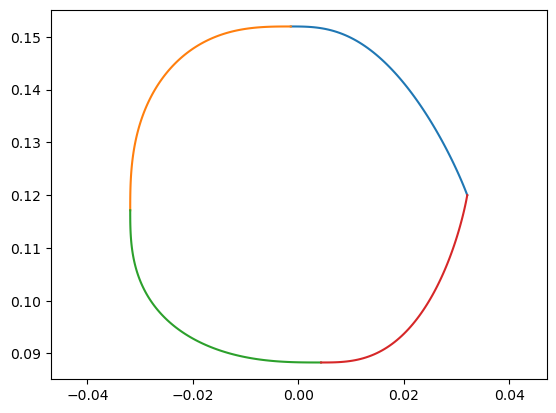

In [36]:
t_vals = np.linspace(0, 2, 100)


# transformation matrix for the end effector
point_from_segment = lambda q : np.array([np.array(T_4[1:3,3].subs({theta0: q[0], theta1: q[1], theta2: q[2], theta3: q[3]}).subs({t:t_val})).ravel() for t_val in t_vals])

#flatten the points
points_A = point_from_segment(q_A)
points_B = point_from_segment(q_B)
points_C = point_from_segment(q_C)
points_D = point_from_segment(q_D)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(points_A[:,0], points_A[:,1])
plt.plot(points_B[:,0], points_B[:,1])
plt.plot(points_C[:,0], points_C[:,1])
plt.plot(points_D[:,0], points_D[:,1])
plt.axis('equal')
plt.show()

